# Machine Learning Packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.
/home/jiwant/PCA_Project/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jiwant/PCA_Project/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jiwant/PCA_Project/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jiwant/PCA_Project/.venv/l

# Extract Training Stet and Text Set with Data Preprocessing

In [2]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

Y_train = train['label'].values.astype('int32')
Y_train = np_utils.to_categorical(Y_train) 
train.drop(['label'], axis=1, inplace=True)

X_train = (train.values).astype('float32')
X_test = (test.values).astype('float32')

# Reshape and Print First Character

Y_train value form: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Which is 0 (1 in [0] position of the vector).


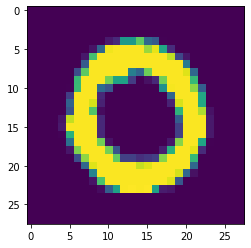

In [3]:
print('Y_train value form: {}'.format(Y_train[1]))
print('Which is 0 (1 in [0] position of the vector).')
plt.imshow(X_train[1].reshape(28,28))
plt.show()

# Standardize All Data

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)
X_sc_test = scaler.transform(X_test)

# Variance vs Number of Dimensions Plot

Text(0, 0.5, 'Cumulative explained variance')

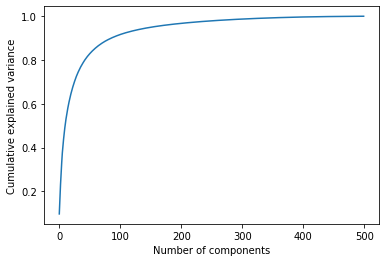

In [5]:
pca = PCA(n_components=500)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Performing PCA with target Dimensional Reduction set to 100

In [6]:
NCOMPONENTS = 100

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_sc_train.shape)
print(X_pca_train.shape)

(42000, 784)
(42000, 100)


# Inverting PCA Decomposition

In [7]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

# Plotting 100D Decompose Image from and Printing it Side by Side

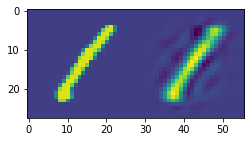

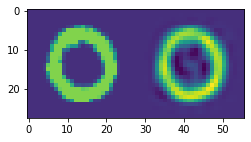

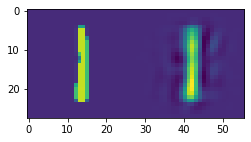

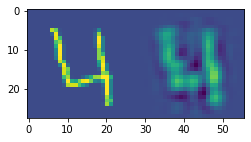

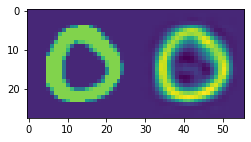

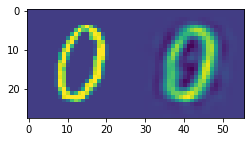

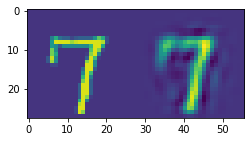

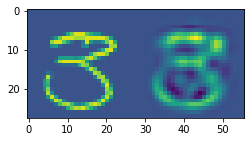

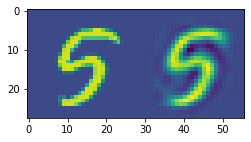

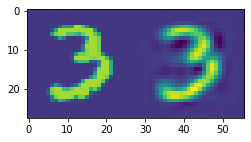

In [8]:
def side_by_side(indexes):
    org = X_train[indexes].reshape(28,28)
    rec = inv_sc[indexes].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()
    
for index in range(0,10):
    side_by_side(index)

# Train Model using simple Perceptron and 

In [9]:
model = Sequential()
layers = 1
units = 128

model.add(Dense(units, input_dim=NCOMPONENTS, activation='relu'))
model.add(GaussianNoise(pca_std))
for i in range(layers):
    model.add(Dense(units, activation='relu'))
    model.add(GaussianNoise(pca_std))
    model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

model.fit(X_pca_train, Y_train, epochs=100, batch_size=256, validation_split=0.15, verbose=2)


Train on 35700 samples, validate on 6300 samples
Epoch 1/100
 - 1s - loss: 2.5300 - categorical_accuracy: 0.4836 - val_loss: 0.4165 - val_categorical_accuracy: 0.8843
Epoch 2/100
 - 0s - loss: 0.8552 - categorical_accuracy: 0.7873 - val_loss: 0.3069 - val_categorical_accuracy: 0.9179
Epoch 3/100
 - 0s - loss: 0.5546 - categorical_accuracy: 0.8483 - val_loss: 0.2634 - val_categorical_accuracy: 0.9238
Epoch 4/100
 - 0s - loss: 0.4152 - categorical_accuracy: 0.8757 - val_loss: 0.2220 - val_categorical_accuracy: 0.9337
Epoch 5/100
 - 0s - loss: 0.3387 - categorical_accuracy: 0.8958 - val_loss: 0.2007 - val_categorical_accuracy: 0.9403
Epoch 6/100
 - 0s - loss: 0.2958 - categorical_accuracy: 0.9079 - val_loss: 0.1780 - val_categorical_accuracy: 0.9459
Epoch 7/100
 - 0s - loss: 0.2642 - categorical_accuracy: 0.9184 - val_loss: 0.1692 - val_categorical_accuracy: 0.9484
Epoch 8/100
 - 0s - loss: 0.2415 - categorical_accuracy: 0.9246 - val_loss: 0.1602 - val_categorical_accuracy: 0.9533
Epoch 

Epoch 68/100
 - 0s - loss: 0.0453 - categorical_accuracy: 0.9851 - val_loss: 0.1078 - val_categorical_accuracy: 0.9751
Epoch 69/100
 - 0s - loss: 0.0440 - categorical_accuracy: 0.9855 - val_loss: 0.1085 - val_categorical_accuracy: 0.9768
Epoch 70/100
 - 0s - loss: 0.0467 - categorical_accuracy: 0.9843 - val_loss: 0.1110 - val_categorical_accuracy: 0.9768
Epoch 71/100
 - 0s - loss: 0.0427 - categorical_accuracy: 0.9858 - val_loss: 0.1119 - val_categorical_accuracy: 0.9763
Epoch 72/100
 - 0s - loss: 0.0407 - categorical_accuracy: 0.9858 - val_loss: 0.1090 - val_categorical_accuracy: 0.9763
Epoch 73/100
 - 0s - loss: 0.0423 - categorical_accuracy: 0.9858 - val_loss: 0.1100 - val_categorical_accuracy: 0.9773
Epoch 74/100
 - 0s - loss: 0.0429 - categorical_accuracy: 0.9856 - val_loss: 0.1076 - val_categorical_accuracy: 0.9767
Epoch 75/100
 - 0s - loss: 0.0416 - categorical_accuracy: 0.9856 - val_loss: 0.1086 - val_categorical_accuracy: 0.9767
Epoch 76/100
 - 0s - loss: 0.0391 - categorical_

In [10]:
predictions = model.predict_classes(X_pca_test, verbose=0)

def write_predictions(predictions, fname):
    pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions}).to_csv(fname, index=False, header=True)

write_predictions(predictions, "pca-keras-mlp.csv")

# Analyze Predictions

In [11]:
predictions = pd.read_csv('./pca-keras-mlp.csv')

In [12]:
predictions

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
